In [57]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv


url='https://tw.movies.yahoo.com/movie_thisweek.html'
req=requests.get(url).text
soup=BeautifulSoup(req,'html.parser')

names=[]
E_names=[]
dates=[]
levels=[]
texts=[]

for movie in soup.find('ul',class_="release_list").find_all('li'):
    
    name=movie.find('div',class_="release_movie_name").a.text.strip()
    names.append(name)
    
    E_name=movie.find('div',class_='en').a.text.strip()
    E_names.append(E_name)

    date=movie.find('div',class_="release_movie_time").text[-10:]
    dates.append(date)
    
    #level=movie.find('span').text
    level=movie.span.text.strip('%')
    levels.append(level)
    
    text=movie.find('div',class_="release_text").text.replace('\n','').replace('\r','').strip()
    texts.append(text)
    
df=pd.DataFrame({'電影名稱':names,'原文片名':E_names,'上映日期':dates,'期待度(%)':levels,'簡介':texts})

df['上映日期']=pd.to_datetime(df['上映日期'], format="%Y-%m-%d")
df

,電影名稱,原文片名,上映日期,期待度(%),簡介
0,海邊走走,Hope Gap,2020-05-15,69,「在愛情的世界裡，沒有先來後到不被愛的那個，才是第三者」～威廉．莎士比亞葛瑞絲（安妮特班寧 ...
1,奪命隧道,The Tunnel,2020-05-15,91,★ 真實災難改編 震驚全球的隧道浩劫 高溫高壓的人性考驗★ 沒水 沒食物 沒氧氣 唯一的希望...
2,奇蹟救援,The Cave,2020-05-15,96,★《隱藏的大明星》《極速秒殺2》製片群打造最驚心動魄的關鍵救援★ 取材自泰國真實事件，全球救...
3,誰殺了唐吉訶德,The Man Who Killed Don Quixote,2020-05-15,88,★ 第71屆坎城影展閉幕片★ 《巴西》、《未來總動員》英國名導泰瑞吉連，賭上人生也要拍出來的...
4,白髮魔女傳,The Bride With White Hair,2020-05-15,95,★華語影壇兩大永遠的巨星張國榮、林青霞合作演出腥風血雨下的淒美虐戀，傳奇重映★ 張國榮武俠愛...
5,末代皇帝,The Last Emperor,2020-05-15,98,★第60屆奧斯卡獎「最佳影片、導演、改編劇本、剪輯、原創配樂、音效、攝影、美術設計、服裝設計...
6,喪屍來鬥陣,Zombie Fighter,2020-05-15,25,★ 繼《屍速列車》後 韓國喪屍邪典強勢再襲★ 末日版《鬥陣俱樂部》暴虐指數破表★ 富川奇幻影...
7,天氣之子,Weathering with You,2020-05-15,64,★ 全台票房突破1.6億大關，榮登台灣影史日片票房No.2★ 日本五週票房冠軍，票房衝破14...
8,來自深淵 深沉靈魂的黎明 4DX/MX4D,MADE IN ABYSS - Dawn of the Deep Soul 4DX/MX4D,2020-05-15,97,★影像製作超越前作，視覺與心靈雙倍衝擊！★日本上映首周即破億元，名列單家戲院票房最高電影！★...
9,葉問4：完結篇,IP MAN 4,2020-05-15,40,★聖誕跨年最強I P，葉問十週年精彩完結篇★甄子丹宗師回歸，十年傳奇最後一戰★《葉問》原班人...


In [17]:
df.to_csv('yahoo_movie.csv',encoding='utf-8-sig')

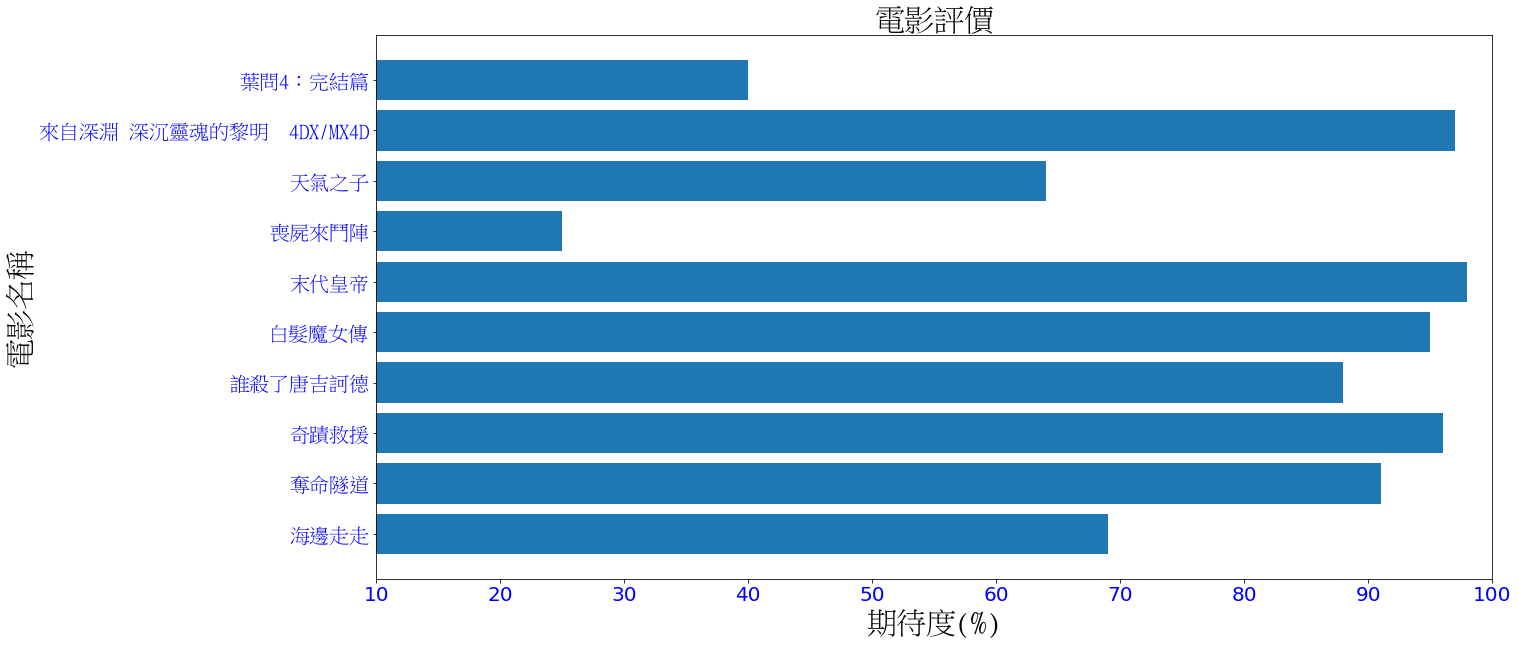

In [68]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

df['期待度(%)']=df['期待度(%)'].astype('int')
x=df['期待度(%)']
y=df['電影名稱']


myfont=FontProperties(fname="C:/Windows/Fonts/mingliu.ttc",size=30)

plt.figure(figsize=(20,10))
plt.barh(y,x)

plt.xticks(size=20,c='b')
plt.yticks(df['電影名稱'],fontproperties=myfont,c='b',size=20)
plt.xlim([10,100])
plt.title('電影評價',fontproperties=myfont)
plt.xlabel('期待度(%)',fontsize=10000,fontproperties=myfont)
plt.ylabel('電影名稱',size=30,fontproperties=myfont)



plt.show()